In [1]:
%matplotlib inline


# Stochastic examples


This example is designed to show how to use the stochatic optimization
algorithms for descrete and semicontinous measures from the POT library.




In [2]:
# Author: Kilian Fatras <kilian.fatras@gmail.com>
#
# License: MIT License

import matplotlib.pylab as pl
import numpy as np
import ot
import ot.plot

COMPUTE TRANSPORTATION MATRIX FOR SEMI-DUAL PROBLEM
############################################################################
############################################################################
 DISCRETE CASE:

 Sample two discrete measures for the discrete case
 ---------------------------------------------

 Define 2 discrete measures a and b, the points where are defined the source
 and the target measures and finally the cost matrix c.



In [3]:
n_source = 7
n_target = 4
reg = 1
numItermax = 1000

a = ot.utils.unif(n_source)
b = ot.utils.unif(n_target)

rng = np.random.RandomState(0)
X_source = rng.randn(n_source, 2)
Y_target = rng.randn(n_target, 2)
M = ot.dist(X_source, Y_target)

Call the "SAG" method to find the transportation matrix in the discrete case
---------------------------------------------

Define the method "SAG", call ot.solve_semi_dual_entropic and plot the
results.



In [4]:
method = "SAG"
sag_pi = ot.stochastic.solve_semi_dual_entropic(a, b, M, reg, method,
                                                numItermax)
print(sag_pi)

[[2.55553509e-02 9.96395660e-02 1.76579142e-02 4.31178196e-06]
 [1.21640234e-01 1.25357448e-02 1.30225078e-03 7.37891338e-03]
 [3.56123975e-03 7.61451746e-02 6.31505947e-02 1.33831456e-07]
 [2.61515202e-02 3.34246014e-02 8.28734709e-02 4.07550428e-04]
 [9.85500870e-03 7.52288517e-04 1.08262628e-02 1.21423583e-01]
 [2.16904253e-02 9.03825797e-04 1.87178503e-03 1.18391107e-01]
 [4.15462212e-02 2.65987989e-02 7.23177216e-02 2.39440107e-03]]


SEMICONTINOUS CASE:

Sample one general measure a, one discrete measures b for the semicontinous
case
---------------------------------------------

Define one general measure a, one discrete measures b, the points where
are defined the source and the target measures and finally the cost matrix c.



In [5]:
n_source = 7
n_target = 4
reg = 1
numItermax = 1000
log = True

a = ot.utils.unif(n_source)
b = ot.utils.unif(n_target)

rng = np.random.RandomState(0)
X_source = rng.randn(n_source, 2)
Y_target = rng.randn(n_target, 2)
M = ot.dist(X_source, Y_target)

Call the "ASGD" method to find the transportation matrix in the semicontinous
case
---------------------------------------------

Define the method "ASGD", call ot.solve_semi_dual_entropic and plot the
results.



In [6]:
method = "ASGD"
asgd_pi, log_asgd = ot.stochastic.solve_semi_dual_entropic(a, b, M, reg, method,
                                                           numItermax, log=log)
print(log_asgd['alpha'], log_asgd['beta'])
print(asgd_pi)

[3.88833283 7.64041833 3.93000933 2.68489048 1.42837354 3.25840738
 2.80033951] [-2.50038759 -2.4083026  -0.96389053  5.87258072]
[[2.49326139e-02 1.01118047e-01 1.68018025e-02 4.67918477e-06]
 [1.20543018e-01 1.29218840e-02 1.25860644e-03 8.13363473e-03]
 [3.52425849e-03 7.83826265e-02 6.09501106e-02 1.47316769e-07]
 [2.62727985e-02 3.49290291e-02 8.11998888e-02 4.55426386e-04]
 [9.00986942e-03 7.15412954e-04 9.65318348e-03 1.23478677e-01]
 [1.98446848e-02 8.60145164e-04 1.67017745e-03 1.20482135e-01]
 [4.16774129e-02 2.77550575e-02 7.07529364e-02 2.67173611e-03]]


Compare the results with the Sinkhorn algorithm
---------------------------------------------

Call the Sinkhorn algorithm from POT



In [7]:
sinkhorn_pi = ot.sinkhorn(a, b, M, reg)
print(sinkhorn_pi)

[[2.55535622e-02 9.96413843e-02 1.76578860e-02 4.31043335e-06]
 [1.21640742e-01 1.25369034e-02 1.30234529e-03 7.37715259e-03]
 [3.56096458e-03 7.61460101e-02 6.31500344e-02 1.33788624e-07]
 [2.61499607e-02 3.34255577e-02 8.28741973e-02 4.07427179e-04]
 [9.85698720e-03 7.52505948e-04 1.08291770e-02 1.21418473e-01]
 [2.16947591e-02 9.04086158e-04 1.87228707e-03 1.18386011e-01]
 [4.15442692e-02 2.65998963e-02 7.23192701e-02 2.39370724e-03]]


PLOT TRANSPORTATION MATRIX
#############################################################################



Plot SAG results
----------------



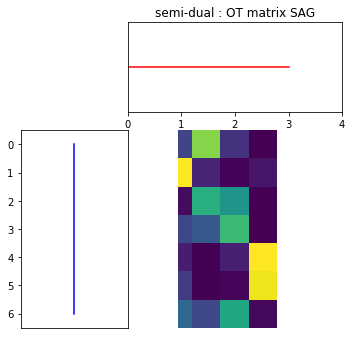

In [8]:
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, sag_pi, 'semi-dual : OT matrix SAG')
pl.show()

Plot ASGD results
-----------------



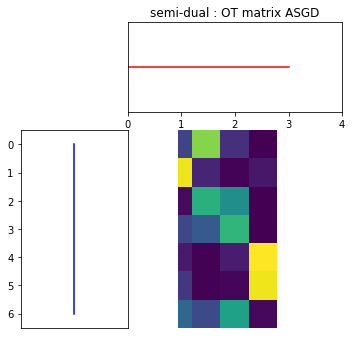

In [9]:
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, asgd_pi, 'semi-dual : OT matrix ASGD')
pl.show()

Plot Sinkhorn results
---------------------



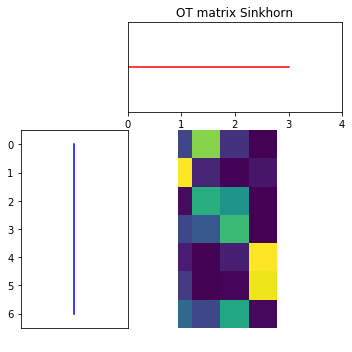

In [10]:
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, sinkhorn_pi, 'OT matrix Sinkhorn')
pl.show()

COMPUTE TRANSPORTATION MATRIX FOR DUAL PROBLEM
############################################################################
############################################################################
 SEMICONTINOUS CASE:

 Sample one general measure a, one discrete measures b for the semicontinous
 case
 ---------------------------------------------

 Define one general measure a, one discrete measures b, the points where
 are defined the source and the target measures and finally the cost matrix c.



In [11]:
n_source = 7
n_target = 4
reg = 1
numItermax = 100000
lr = 0.1
batch_size = 3
log = True

a = ot.utils.unif(n_source)
b = ot.utils.unif(n_target)

rng = np.random.RandomState(0)
X_source = rng.randn(n_source, 2)
Y_target = rng.randn(n_target, 2)
M = ot.dist(X_source, Y_target)

Call the "SGD" dual method to find the transportation matrix in the
semicontinous case
---------------------------------------------

Call ot.solve_dual_entropic and plot the results.



In [12]:
sgd_dual_pi, log_sgd = ot.stochastic.solve_dual_entropic(a, b, M, reg,
                                                         batch_size, numItermax,
                                                         lr, log=log)
print(log_sgd['alpha'], log_sgd['beta'])
print(sgd_dual_pi)

[0.92524245 2.75994495 1.08144666 0.02747421 0.60913832 1.8156535
 0.11738177] [0.33905828 0.46705197 1.56941919 4.96075241]
[[2.20327995e-02 9.26244184e-02 1.09321230e-02 9.71212784e-08]
 [1.56579562e-02 1.73985799e-03 1.20373178e-04 2.48153271e-05]
 [3.49227454e-03 8.05110304e-02 4.44694627e-02 3.42874458e-09]
 [3.15181548e-02 4.34346087e-02 7.17227024e-02 1.28326090e-05]
 [6.79336320e-02 5.59136813e-03 5.35899879e-02 2.18675752e-02]
 [8.02083959e-02 3.60364770e-03 4.97032746e-03 1.14377502e-02]
 [4.87374362e-02 3.36433325e-02 6.09190548e-02 7.33833971e-05]]


Compare the results with the Sinkhorn algorithm
---------------------------------------------

Call the Sinkhorn algorithm from POT



In [13]:
sinkhorn_pi = ot.sinkhorn(a, b, M, reg)
print(sinkhorn_pi)

[[2.55535622e-02 9.96413843e-02 1.76578860e-02 4.31043335e-06]
 [1.21640742e-01 1.25369034e-02 1.30234529e-03 7.37715259e-03]
 [3.56096458e-03 7.61460101e-02 6.31500344e-02 1.33788624e-07]
 [2.61499607e-02 3.34255577e-02 8.28741973e-02 4.07427179e-04]
 [9.85698720e-03 7.52505948e-04 1.08291770e-02 1.21418473e-01]
 [2.16947591e-02 9.04086158e-04 1.87228707e-03 1.18386011e-01]
 [4.15442692e-02 2.65998963e-02 7.23192701e-02 2.39370724e-03]]


Plot  SGD results
-----------------



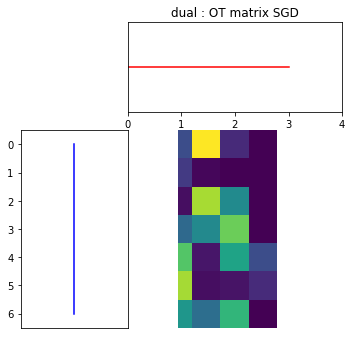

In [14]:
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, sgd_dual_pi, 'dual : OT matrix SGD')
pl.show()

Plot Sinkhorn results
---------------------



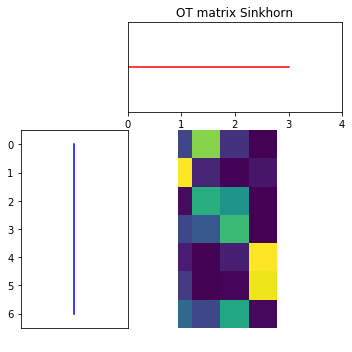

In [15]:
pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, sinkhorn_pi, 'OT matrix Sinkhorn')
pl.show()